In [185]:

import pandas as pd

df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")
print(df.head())


   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear             truck           1   
1          102  2/10/2023  Mumbai   Rainy               bus           3   
2          103   3/5/2023  Bhopal     Fog              bike           0   
3          104  3/25/2023  Indore   Clear             truck           0   
4          105  4/12/2023    Pune   Clear               car           2   

  Severity cause_of_accident  
0      Low          whether   
1     High           alcohol  
2   Medium      overspeeding  
3      Low          whether   
4     High           alcohol  


In [186]:
df.describe()

,Accident_ID,Casualties
count,8.00000,8.000000
mean,104.50000,1.250000
std,2.44949,1.035098
min,101.00000,0.000000
25%,102.75000,0.750000
50%,104.50000,1.000000
75%,106.25000,2.000000
max,108.00000,3.000000


In [187]:
df.tail(3)

,Accident_ID,Date,City,Weather,Vehicles_Involved,Casualties,Severity,cause_of_accident
5,106,5/8/2023,Delhi,Rainy,truck,1,Low,overspeeding
6,107,5/20/2023,Bhopal,Fog,car,1,Medium,whether
7,108,6/1/2023,Mumbai,Clear,truck,2,High,alcohol


# starter Code (01_data_cleaning.ipynb)

In [188]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.dropna(inplace=True)                  # Drop missing values (basic cleaning)

# Step 4: Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

print(df[['Date', 'Month', 'Day_of_Week']].head())


Dataset Shape: (8, 8)
   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear             truck           1   
1          102  2/10/2023  Mumbai   Rainy               bus           3   
2          103   3/5/2023  Bhopal     Fog              bike           0   
3          104  3/25/2023  Indore   Clear             truck           0   
4          105  4/12/2023    Pune   Clear               car           2   

  Severity cause_of_accident  
0      Low          whether   
1     High           alcohol  
2   Medium      overspeeding  
3      Low          whether   
4     High           alcohol  
        Date  Month Day_of_Week
0 2023-01-15      1      Sunday
1 2023-02-10      2      Friday
2 2023-03-05      3      Sunday
3 2023-03-25      3    Saturday
4 2023-04-12      4   Wednesday


# Starter Code for EDA (02_eda_visualization.ipynb)

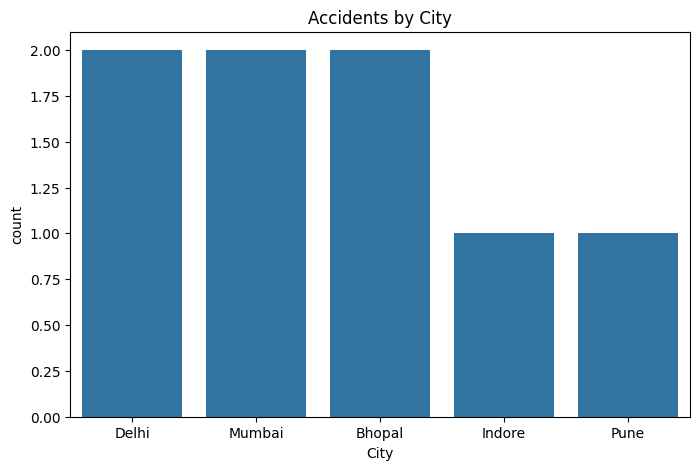

In [189]:
# City-wise accident count
plt.figure(figsize=(8,5))
sns.countplot(x="City", data=df)
plt.title("Accidents by City")
plt.show()

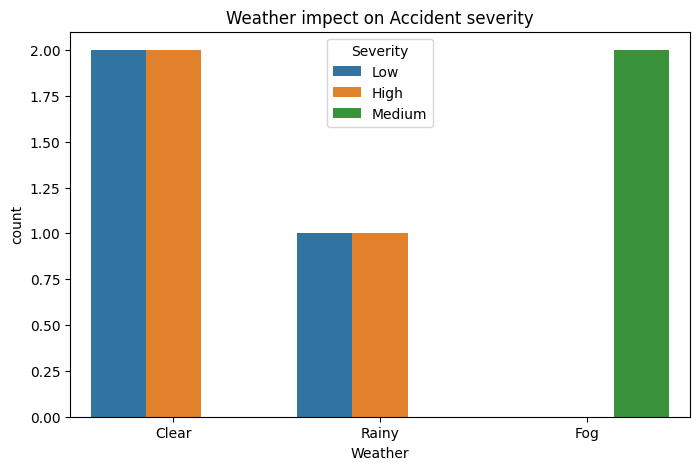

In [190]:
# whether vs severity
plt.figure(figsize=(8,5))
sns.countplot(x="Weather", hue="Severity", data=df)
plt.title("Weather impect on Accident severity")
plt.show()


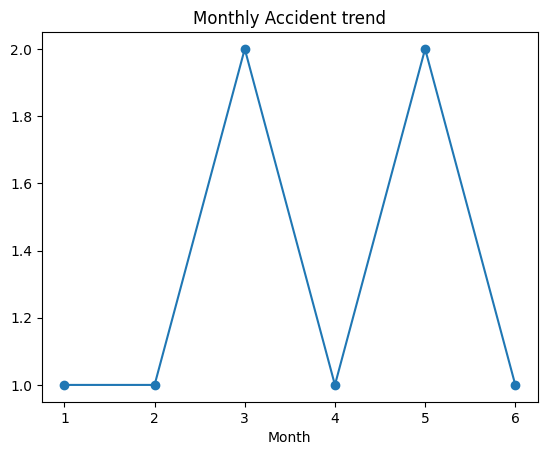

In [191]:
#Time trend
df.groupby("Month")["Accident_ID"].count().plot(kind="line", marker="o")
plt.title("Monthly Accident trend")
plt.show()

In [192]:
print(df.columns)


Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident', 'Month', 'Day_of_Week'],
      dtype='object')


# Starter Code for ML (03_ML_Model.ipynb)

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Data Load
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

# 2. Target column (Severity)
y = df["Severity"]

# 3. Features (baaki sab, except Severity)
X = df.drop(["Severity", "Accident_ID", "Date"], axis=1)  
# Accident_ID aur Date analysis me useful nahi hote, isliye hata diye

# 4. Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 5. Encode target (Low=0, Medium=1, High=2)
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Features shape:", X_train.shape)
print("✅ Target shape:", y_train.shape)


✅ Features shape: (6, 12)
✅ Target shape: (6,)


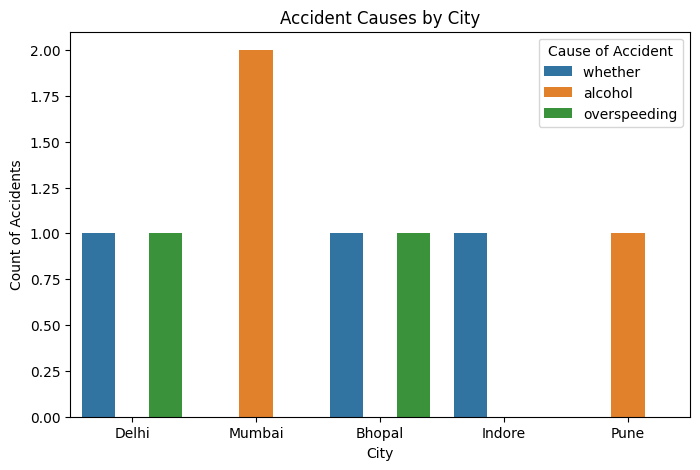

In [194]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="City", hue="cause_of_accident", data=df)

plt.title("Accident Causes by City")
plt.xlabel("City")
plt.ylabel("Count of Accidents")
plt.legend(title="Cause of Accident")
plt.show()


In [195]:
print (df.columns)

Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident'],
      dtype='object')


In [196]:
df["Vehicles_Involved"]


0    truck
1      bus
2     bike
3    truck
4      car
5    truck
6      car
7    truck
Name: Vehicles_Involved, dtype: object

#Bar chart

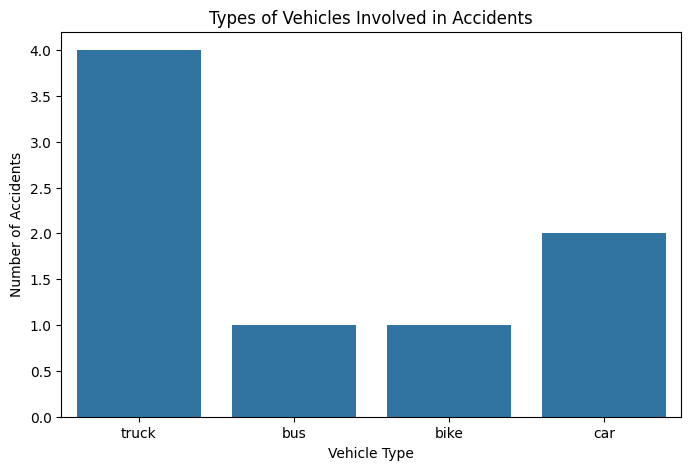

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="Vehicles_Involved", data=df)

plt.title("Types of Vehicles Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.show()


# pie chart

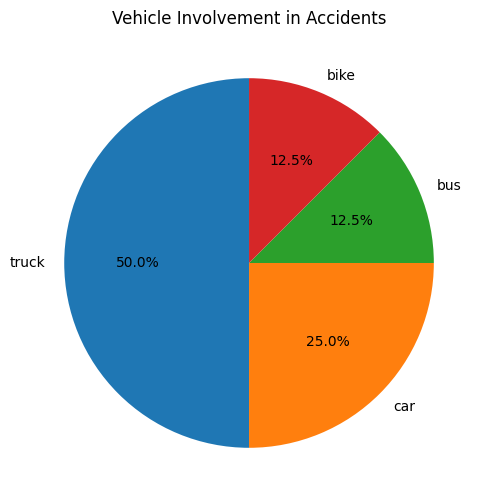

In [198]:
df["Vehicles_Involved"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(6,6), 
    startangle=90
)
plt.title("Vehicle Involvement in Accidents")
plt.ylabel("")
plt.show()
